In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [7]:
from sklearn.svm import SVC

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
data=load_iris()
X=data.data
y=data.target
target_names=data.target_names

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.metrics import confusion_matrix


In [31]:

# -------------------------------
# 2) Utility function
# -------------------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n{name}")
    print("-" * 40)
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="red")
    plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    }


In [32]:
svm_linear=Pipeline([
    ("scaler",StandardScaler()),
    ("svc",SVC(kernel="linear",random_state=42))
])

In [40]:
svm_rbf=Pipeline([
    ("scaler",StandardScaler()),
    ("svc",SVC(kernel="rbf",gamma="scale",random_state=42))
])

In [41]:
svm_poly=Pipeline([
    ("scaler",StandardScaler()),
    ("svc",SVC(kernel="poly", degree=3, gamma="scale",random_state=42))
])

In [42]:
dt_gini=DecisionTreeClassifier(criterion="gini",random_state=42)

In [43]:
dt_entropy=DecisionTreeClassifier(criterion="entropy",random_state=42)

In [44]:
results=[]
from sklearn.metrics import classification_report


SVM(linear)
----------------------------------------
Accuracy : 0.9
Precision: 0.9230769230769231
Recall   : 0.9
F1 Score : 0.89769820971867

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



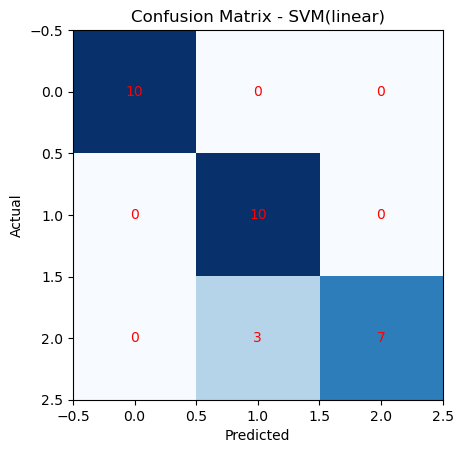

In [45]:
results.append(evaluate_model("SVM(linear)",svm_linear,X_train,y_train,X_test,y_test))


SVM(linear)
----------------------------------------
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



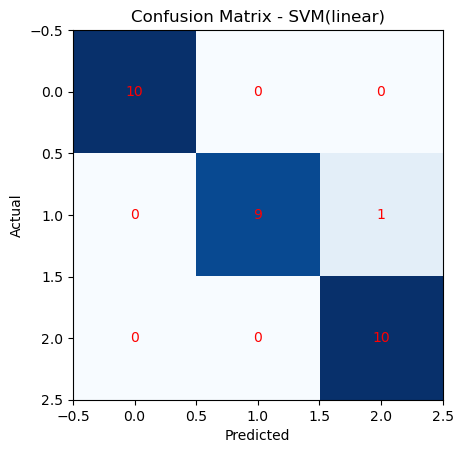

In [46]:
results.append(evaluate_model("SVM(linear)",svm_rbf,X_train,y_train,X_test,y_test))


SVM(linear)
----------------------------------------
Accuracy : 0.9
Precision: 0.9230769230769231
Recall   : 0.9
F1 Score : 0.89769820971867

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



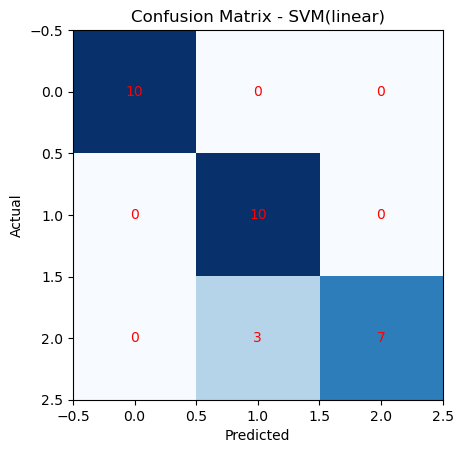

In [47]:
results.append(evaluate_model("SVM(linear)",svm_poly,X_train,y_train,X_test,y_test))


Decision Tree (Gini)
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



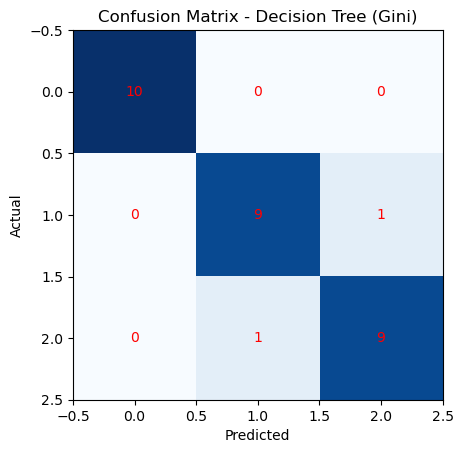

In [48]:

results.append(evaluate_model("Decision Tree (Gini)", dt_gini, X_train, y_train, X_test, y_test))


Decision Tree (Entropy)
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



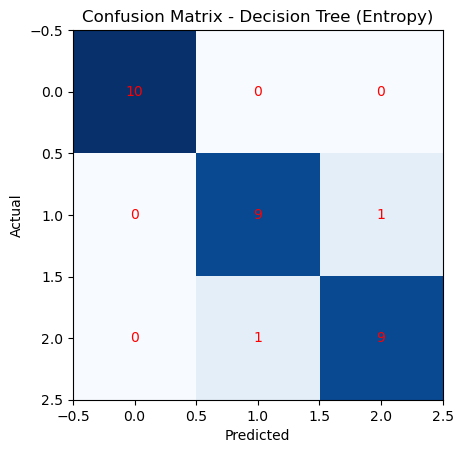

In [49]:

results.append(evaluate_model("Decision Tree (Entropy)", dt_entropy, X_train, y_train, X_test, y_test))

In [50]:
results_df=pd.DataFrame(results)

In [51]:
results_df

,Model,Accuracy,Precision,Recall,F1
0,SVM(linear),0.900000,0.923077,0.900000,0.897698
1,SVM(linear),0.966667,0.969697,0.966667,0.966583
2,SVM(linear),0.900000,0.923077,0.900000,0.897698
3,Decision Tree (Gini),0.933333,0.933333,0.933333,0.933333
4,Decision Tree (Entropy),0.933333,0.933333,0.933333,0.933333


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
# -------------------------------
# 3) Base Classifiers
# -------------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
nb = GaussianNB()

In [54]:
# -------------------------------
# 4) Ensemble Methods
# -------------------------------

# Bagging with Decision Tree
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

# Boosting with AdaBoost
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

# Stacking (KNN + NB + DT + RF → Logistic Regression as meta-model)
stacking = StackingClassifier(
    estimators=[
        ("knn", Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])),
        ("nb", GaussianNB()),
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=False
)


Decision Tree
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



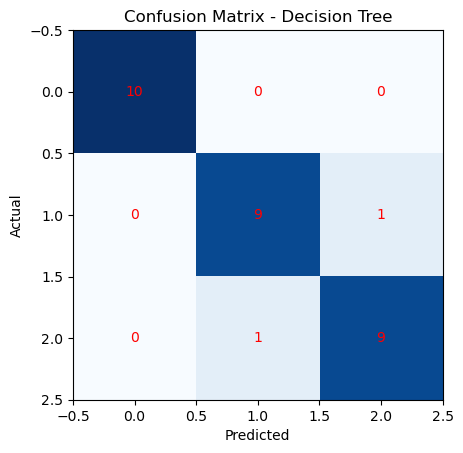

In [55]:
# -------------------------------
# 5) Train & Evaluate
# -------------------------------
results = []

# Individual classifiers
results.append(evaluate_model("Decision Tree", dt, X_train, y_train, X_test, y_test))


Random Forest
----------------------------------------
Accuracy : 0.9
Precision: 0.9023569023569024
Recall   : 0.9
F1 Score : 0.8997493734335839

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



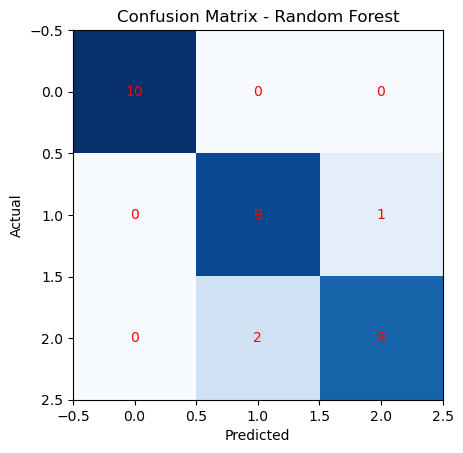

In [56]:
results.append(evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test))


KNN
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9444444444444445
Recall   : 0.9333333333333333
F1 Score : 0.9326599326599326

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



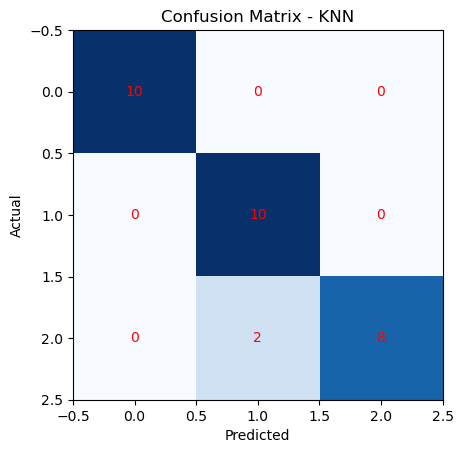

In [57]:
results.append(evaluate_model("KNN", knn, X_train, y_train, X_test, y_test))


Naive Bayes
----------------------------------------
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



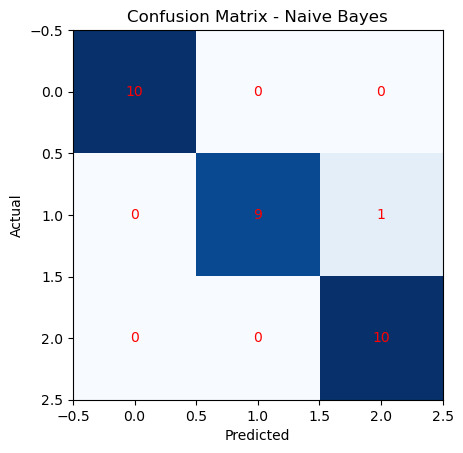

In [58]:
results.append(evaluate_model("Naive Bayes", nb, X_train, y_train, X_test, y_test))


Bagging (Decision Tree)
----------------------------------------
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



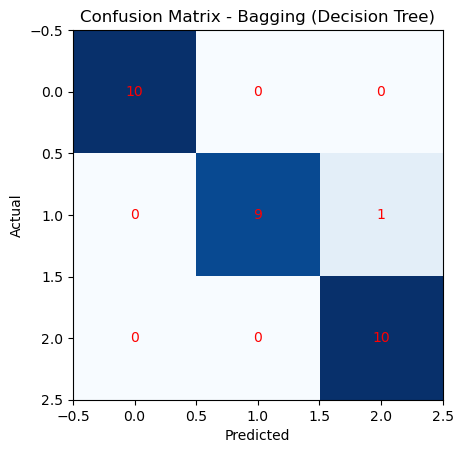

In [59]:
# Ensemble classifiers
results.append(evaluate_model("Bagging (Decision Tree)", bagging, X_train, y_train, X_test, y_test))


AdaBoost (Decision Stump)
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



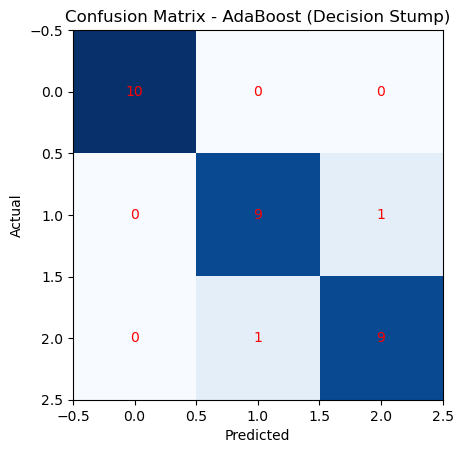

In [60]:
results.append(evaluate_model("AdaBoost (Decision Stump)", adaboost, X_train, y_train, X_test, y_test))


Stacking (KNN+NB+DT+RF)
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



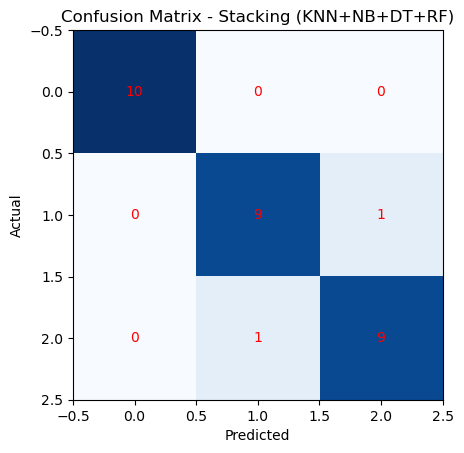

In [61]:
results.append(evaluate_model("Stacking (KNN+NB+DT+RF)", stacking, X_train, y_train, X_test, y_test))

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


Gradient Boosting
----------------------------------------
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



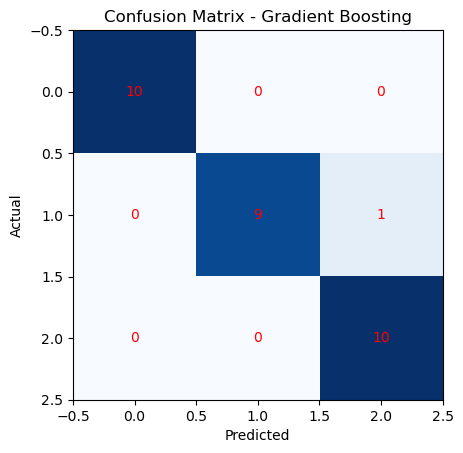

In [63]:
results.append(evaluate_model("Gradient Boosting", gradient_boosting, X_train, y_train, X_test, y_test))

In [64]:
results_df = pd.DataFrame(results)
print("\n\nFinal Comparison Table:\n")
print(results_df)



Final Comparison Table:

                       Model  Accuracy  Precision    Recall        F1
0              Decision Tree  0.933333   0.933333  0.933333  0.933333
1              Random Forest  0.900000   0.902357  0.900000  0.899749
2                        KNN  0.933333   0.944444  0.933333  0.932660
3                Naive Bayes  0.966667   0.969697  0.966667  0.966583
4    Bagging (Decision Tree)  0.966667   0.969697  0.966667  0.966583
5  AdaBoost (Decision Stump)  0.933333   0.933333  0.933333  0.933333
6    Stacking (KNN+NB+DT+RF)  0.933333   0.933333  0.933333  0.933333
7          Gradient Boosting  0.966667   0.969697  0.966667  0.966583


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import warnings

In [66]:
df = pd.read_csv("diabetes.csv")

In [67]:
print("\nFirst 5 rows:")
print(df.head())

# Prepare data for clustering
# Remove the target column (Outcome) since clustering is unsupervised
X = df.drop("Outcome", axis=1)
y_true = df["Outcome"]  # Keep for comparison

# Standardize the features (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nNumber of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")


First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Number of samples: 768
Number of features: 8


1. K-MEANS CLUSTERING


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

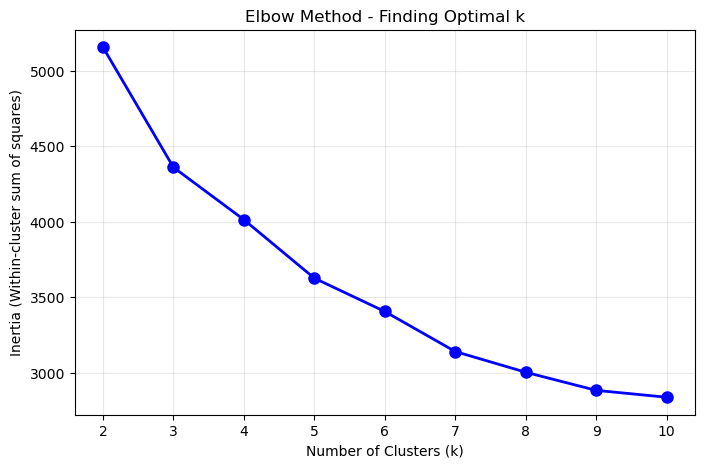

In [68]:
# 1. K-MEANS CLUSTERING
print("=" * 50)
print("1. K-MEANS CLUSTERING")
print("=" * 50)

# Find optimal number of clusters using Elbow Method
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method - Finding Optimal k")
plt.grid(True, alpha=0.3)
plt.show()

In [69]:
# Use k=3 based on elbow method
optimal_k = 3
print(f"\nUsing k = {optimal_k} clusters")

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f"\nK-Means Results:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Cluster sizes: {np.bincount(kmeans_labels)}")


Using k = 3 clusters

K-Means Results:
Silhouette Score: 0.1807
Cluster sizes: [213 221 334]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [70]:

# 2. K-MEDOIDS CLUSTERING
print("=" * 50)
print("2. K-MEDOIDS CLUSTERING")
print("=" * 50)

# Apply K-Medoids (similar to K-Means but uses medoids instead of centroids)
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42, method="pam")
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluate
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)

print(f"\nK-Medoids Results:")
print(f"Silhouette Score: {kmedoids_silhouette:.4f}")
print(f"Cluster sizes: {np.bincount(kmedoids_labels)}")
print(f"\nMedoid indices (cluster centers): {kmedoids.medoid_indices_}")

2. K-MEDOIDS CLUSTERING

K-Medoids Results:
Silhouette Score: 0.1366
Cluster sizes: [298 167 303]

Medoid indices (cluster centers): [122 603 444]
